<p style="margin-bottom:10px">Q1. Create 1000 draws from a normal distribution of mean of 1.5 and standard deviation of 0.5. Plot the pdf. Calculate the sample mean, variance, skewness, kurtosis as well as standard deviation using MAD and $\sigma_{g}$ of these samples.</p>

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astroML import stats

In [2]:
mean=1.5
standard_deviation=0.5
num_of_draws=1000
# Changing the above variables will change mean, standard deviation and the number of samples you get from normal 
# distribution

In [3]:
samples_1000=scipy.stats.norm.rvs(size=num_of_draws,loc=mean,scale=standard_deviation) 

In [4]:
print(samples_1000)
# The above prints the 1000 samples of normal distribution with given mean and standard deviation

[1.5451872  0.62418768 0.46659731 1.78960662 1.03228819 1.74028676
 1.06967615 1.95618001 1.87141236 1.89092106 1.88191298 2.53225807
 2.0713298  1.45742487 1.67472998 1.59585738 1.42127001 1.43698821
 1.7117037  1.43727048 1.79680373 1.01688657 2.2458161  0.9366879
 1.78484396 1.51397602 0.51804671 0.72733119 1.39367217 1.26745081
 0.51446779 1.84697904 1.37441159 1.86546699 1.59854419 1.30364566
 1.69323137 1.11890698 1.18508735 1.05534556 0.93104539 1.76830069
 1.60880916 1.58714892 1.02675395 1.92693898 1.62645925 1.59507772
 1.02092721 1.59147935 1.76124048 0.76910656 2.04763986 1.88257459
 1.95673563 1.16670224 2.4137785  1.47271974 2.31138181 1.67583608
 1.91491752 1.79537489 1.11621998 0.79571291 0.62471014 1.51107338
 1.64281687 2.12896031 2.04104028 1.70410941 1.23112248 1.88020293
 1.80238911 1.78090642 1.82823894 1.81213543 0.93451521 0.81157702
 1.40388312 1.1630192  1.92218229 2.55606479 1.12507757 1.87525237
 2.1155349  1.29606073 2.04509658 1.70579679 1.96025534 1.37824

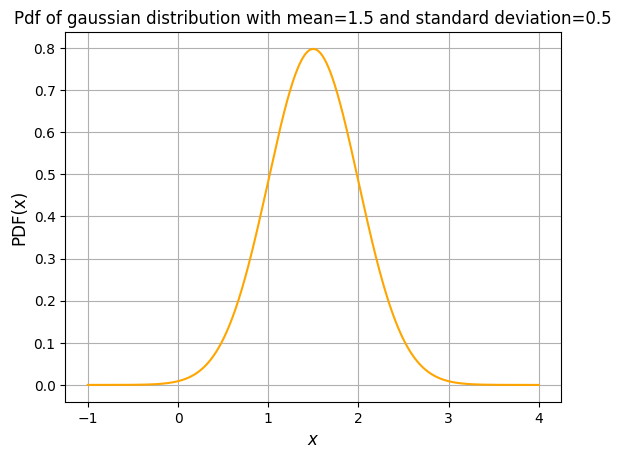

In [5]:
gaussian_distribution=scipy.stats.norm(mean,standard_deviation)

x = np.linspace(-1, 4, 1000) # 1000 input samples of x from -1 to 4

plt.plot(x,gaussian_distribution.pdf(x),ls='-',label='Gaussian distribution with $\mu$=1.5 and $\sigma$=0.5',
         color="orange")
plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'PDF(x)', fontsize = 12)
plt.title("Pdf of gaussian distribution with mean=1.5 and standard deviation=0.5")
plt.grid()

# plotting pdf(x) 

In [6]:
mean1,var,skew,kurt=np.mean(samples_1000),np.var(samples_1000),scipy.stats.skew(samples_1000),scipy.stats.kurtosis(samples_1000)

In [7]:
print(f'Mean: {mean1},Variance: {var},Skewness: {skew},Kurtosis: {kurt}')
# prints mean, variance, skewness, kurtosis (Ideally we should get mean as 1.5, variance=0.25, skewness=0 and kurtosis=0 
# for gaussian distribution)

Mean: 1.5182976220532185,Variance: 0.24014396882629416,Skewness: -0.009736740030592892,Kurtosis: -0.19980704092391122


In [8]:
mean1,var,skew,kurt=scipy.stats.norm.stats(moments='mvsk',loc=1.5,scale=0.5)

print(f'Actual Mean: {mean1},Variance: {var},Skewness: {skew},Kurtosis: {kurt}')

Actual Mean: 1.5,Variance: 0.25,Skewness: 0.0,Kurtosis: 0.0


<p style="margin-bottom:10px">The Difference in all the quantifiers between actual and calculated from those 1000 samples is because the actual would perform quantifiers like mean, median etc on the infinite samples of distribution where we are considering 1000 samples which is generally good enough to get good approximate too.</p>

In [9]:
# finding standard deviation using MAD

median_1000=np.median(samples_1000)
mad_x=[]

for i in samples_1000:
    mad_x.append(abs(i-median_1000))

MAD=np.median(mad_x)
standard_deviation_from_mad=1.482*MAD

print(f'Standard deviation using Median Absolute Deviation is {standard_deviation_from_mad}')

Standard deviation using Median Absolute Deviation is 0.49548046375969157


In [10]:
sigma_g=stats.sigmaG(samples_1000)

print(r'Required Sigma_g is',sigma_g)

Required Sigma_g is 0.49245984832965356


<p style="margin-bottom:10px">Q2. Plot a Cauchy distribution with $\mu$=0 and $\gamma$=1.5 superposed on the top of a Gaussian distribution with $\mu$=0 and $\sigma$=1.5. Use two different line styles to distinguish between the Gaussan and Cauchy distribution on the plot and also indicate these in the legends.</p>

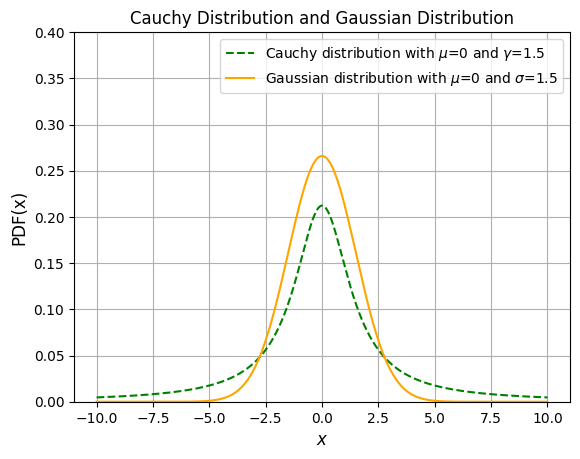

In [11]:
mu_cauchy=0
gamma_cauchy=1.5

mu_gaussian=0
sigma_gaussian=1.5

cauchy_distribution=scipy.stats.cauchy(mu_cauchy,gamma_cauchy)
gaussian_distribution=scipy.stats.norm(mu_gaussian,sigma_gaussian)

x = np.linspace(-10, 10, 2000) # 2000 input samples of x from -10 to 10 
plt.ylim(0,0.4)

plt.plot(x,cauchy_distribution.pdf(x),ls='--',label='Cauchy distribution with $\mu$=0 and $\gamma$=1.5',color="green")
plt.plot(x,gaussian_distribution.pdf(x),ls='-',label='Gaussian distribution with $\mu$=0 and $\sigma$=1.5',color="orange")
plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'PDF(x)', fontsize = 12)
plt.title('Cauchy Distribution and Gaussian Distribution', fontsize = 12)

plt.legend()
plt.grid()
plt.show()

<p style="margin-bottom:10px">Q3. Plot Poisson distribution with mean of 5, superposed on top of a Gaussian distribution with mean of 5 and standard deviation of square root of 5. Use two different line styles for the two distributions and make sure the
plot contains legends for both of them.</p>

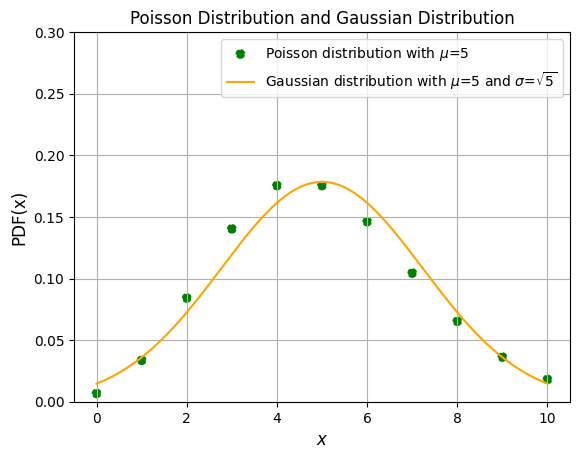

In [12]:
mu_poisson=5

mu_gaussian=5
sigma_gaussian=np.sqrt(5)

import math

def poisson_pmf(x):
    p=[]
#   Function that is available in scipy would take only integers as factorial is defined on integers only but using gamma
#   function we can extend factorial defination to non integers so that we can take more number of samples in between 
#   integers also
    
    for t in x:
        fact=math.gamma(t+1)
        p.append((math.exp(-5)*5**t)/fact)
        
    return p

poisson_distribution=scipy.stats.poisson(mu=mu_poisson)
gaussian_distribution=scipy.stats.norm(mu_gaussian,sigma_gaussian)

x = np.linspace(0, 10, 4000) # 4000 input samples of x from 0 to 10 
plt.ylim(0,0.3)
y=np.array([0,1,2,3,4,5,6,7,8,9,10])

plt.scatter(y,poisson_pmf(y),ls='--',label='Poisson distribution with $\mu$=5',color="green")
# scatter plot to show only discrete version of poisson distribution as it is discrete distribution taking only integers
plt.plot(x,gaussian_distribution.pdf(x),ls='-',label='Gaussian distribution with $\mu$=5 and $\sigma$=$\sqrt{5}$',
         color="orange")
plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'PDF(x)', fontsize = 12)
plt.title('Poisson Distribution and Gaussian Distribution',fontsize=12)

plt.legend()
plt.grid()
plt.show()

<p>The above is the scatter plot of poisson showing it is discrete distribution whereas gaussian is a continous distribution. Now I have tried defining factorial using gamma function for non integers to plot the poisson distribution continously like gaussian.</p>

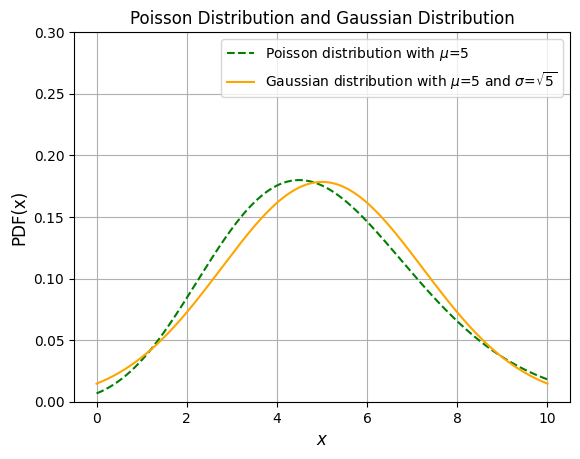

In [13]:
mu_poisson=5

mu_gaussian=5
sigma_gaussian=np.sqrt(5)

import math

def poisson_pmf(x):
    p=[]
#   Function that is available in scipy would take only integers as factorial is defined on integers only but using gamma
#   function we can extend factorial defination to non integers so that we can take more number of samples in between 
#   integers also
    
    for t in x:
        fact=math.gamma(t+1)
        p.append((math.exp(-5)*5**t)/fact)
        
    return p

poisson_distribution=scipy.stats.poisson(mu=mu_poisson)
gaussian_distribution=scipy.stats.norm(mu_gaussian,sigma_gaussian)

x = np.linspace(0, 10, 4000) # 4000 input samples of x from 0 to 10 
plt.ylim(0,0.3)

plt.plot(x,poisson_pmf(x),ls='--',label='Poisson distribution with $\mu$=5',color="green")
plt.plot(x,gaussian_distribution.pdf(x),ls='-',label='Gaussian distribution with $\mu$=5 and $\sigma$=$\sqrt{5}$',
         color="orange")
plt.xlabel('$x$', fontsize = 12)
plt.ylabel(r'PDF(x)', fontsize = 12)
plt.title('Poisson Distribution and Gaussian Distribution',fontsize=12)

plt.legend()
plt.grid()
plt.show()

<p style="margin-bottom:10px">Q4. The following were the measurements of mean lifetime of K meson (as of 1990) (in units of 10<sup>−10</sup> s) : 0.8920±0.00044; 0.881±0.009; 0.8913±0.00032; 0.9837±0.00048; 0.8958±0.00045. Calculate the weighted mean lifetime and uncertainty of the mean.</p>

In [14]:
measurement_1,error_1=0.8920,0.00044
measurement_2,error_2=0.881,0.009
measurement_3,error_3=0.8913,0.00032
measurement_4,error_4=0.9837,0.00048
measurement_5,error_5=0.8958,0.00045

measurements_avg=[measurement_1,measurement_2,measurement_3,measurement_4,measurement_5]
errors_avg=[error_1,error_2,error_3,error_4,error_5]

sum1=0
sum2=0

for xi,ei in zip(measurements_avg,errors_avg):
    sum1+=xi/(ei*ei)
    sum2+=1/(ei*ei)

weighted_mean_lifetime=sum1/sum2

uncertainity_mean=np.sqrt(1/sum2)

print(f'Weighted mean lifetime of k meson = {weighted_mean_lifetime} and uncertainity in mean = {uncertainity_mean}')
# prints weighted mean lifetime of K meson

Weighted mean lifetime of k meson = 0.9089185199574897 and uncertainity in mean = 0.00020318737026848627


<p style="margin-bottom:10px">Q5. Download the eccentricity distribution of exoplanets from the exoplanet catalog http://exoplanet.eu/catalog/. Look for the column titled e, which denotes the eccentricity. Draw the histogram of this distribution. Then redraw the same histogram after Gaussianizing the distribution using Box-transformation either using scipy.stats.boxcox or from first prin-ciples using the equations shown in class or in arXiv:1508.00931. Note that exoplanets without eccentricity data can be ignored.</p>

In [15]:
# Code for downloading the csv file from the website and stores in csv file named data.csv
import urllib.request
import os

DOWNLOAD_URL="http://exoplanet.eu/catalog/csv"
local_path=os.path.join("./","data.csv")
urllib.request.urlretrieve(DOWNLOAD_URL,local_path)

('./data.csv', <http.client.HTTPMessage at 0x10b79953a60>)

In [16]:
import csv

# To read csv file and load the data into our array or lists 
f = open('data.csv')
csv_reader = csv.reader(f)
next(csv_reader)

eccentricity_list=[]
# storing all eccentricities and ignoring the columns where they haven't given any eccentricity for that planet
for line in csv_reader:
    if(line[17]):
        eccentricity_list.append(float(line[17]))

Text(0.5, 1.0, 'Histogram of Eccentricity data from given website')

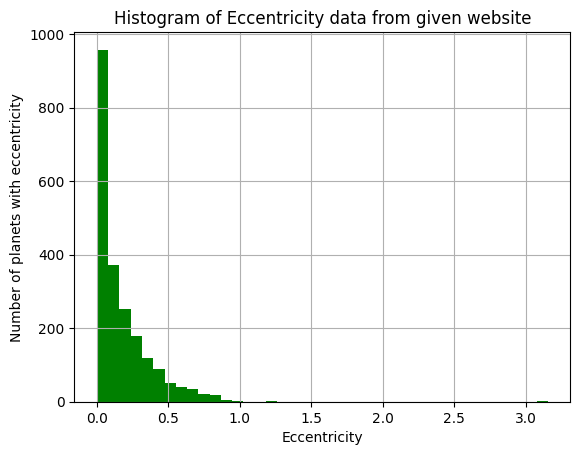

In [17]:
# plotting histogram of above data
bins = 40
plt.hist(eccentricity_list,bins,color='green')

plt.xlabel('Eccentricity')
plt.grid()
plt.ylabel('Number of planets with eccentricity')
plt.title('Histogram of Eccentricity data from given website')

In [18]:
eccentricity_list = [i for i in eccentricity_list if i > 0]
# As boxcox requires positive values only so should remove all negative and 0 values
eccentricity_list_transformed, _= scipy.stats.boxcox(eccentricity_list)

Text(0.5, 1.0, 'Histogram of Eccentricity data after gaussianizing data')

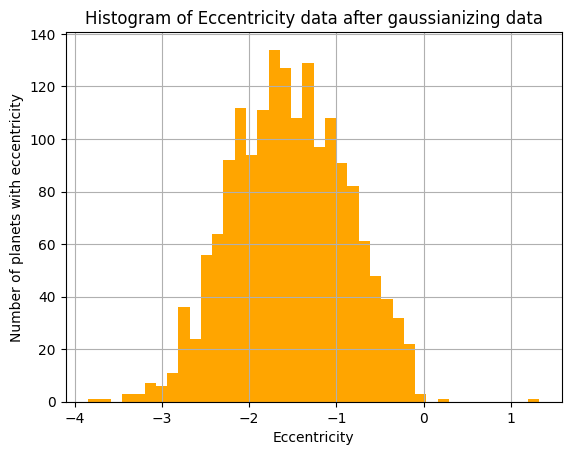

In [19]:
# plotting histogram of above data
bins = 40
plt.hist(eccentricity_list_transformed,bins,color='orange')

plt.xlabel('Eccentricity')
plt.grid()
plt.ylabel('Number of planets with eccentricity')
plt.title('Histogram of Eccentricity data after gaussianizing data')